# House Price Prediction using Simple Linear Regression

##  Project Overview
This project aims to predict residential property prices based on the area (in square feet) using Simple Linear Regression.

The objective is to analyze the relationship between property size and price and build a predictive model that can estimate house prices accurately.

---

**Author:** Divya Jagtap
**Tools Used:** Python, Pandas, NumPy, Matplotlib, Scikit-learn  


##  Problem Statement

Real estate pricing is largely influenced by property size. The goal of this project is to build a predictive model that estimates house prices based on the total area (in square feet).

### Objective:
- Analyze the relationship between area and price.
- Build a Simple Linear Regression model.
- Evaluate model performance using R², MSE, and RMSE.
- Interpret results and derive business insights.

### Input (Independent Variable):
- Area (sq.ft)

### Output (Dependent Variable):
- Price (₹)

This project demonstrates how regression analysis can be applied to real-world business problems such as property valuation.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
data=pd.read_csv("C:/Users/admin/OneDrive/Desktop/house prediction/house_prices.csv")

In [44]:
data.head()

,Area,Price
0,600,2950000
1,700,3520000
2,800,3980000
3,900,4550000
4,1000,5020000


In [45]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Area    100 non-null    int64
 1   Price   100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


,Area,Price
count,100.000000,1.000000e+02
mean,1628.000000,8.142300e+06
std,581.704219,2.911998e+06
min,600.000000,2.950000e+06
25%,1135.000000,5.690000e+06
50%,1630.000000,8.160000e+06
75%,2125.000000,1.063000e+07
max,2640.000000,1.322000e+07


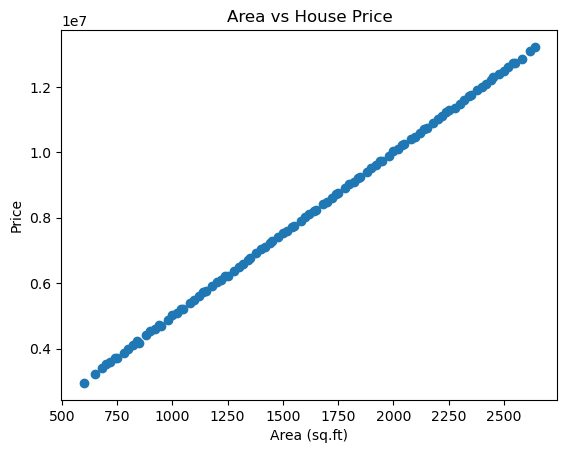

In [46]:
plt.scatter(data['Area'], data['Price'])
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price")
plt.title("Area vs House Price")
plt.show()

In [47]:
data.corr()

,Area,Price
Area,1.000000,0.999969
Price,0.999969,1.000000


In [48]:
x=data[["Area"]]
y=data[["Price"]]

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
model = LinearRegression()
model.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
y_pred=model.predict(xtest)

In [52]:
model.predict([[1000]])
model.predict([[1500]])
model.predict([[2000]])


array([[10005425.07989545]])

In [53]:
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.9999271935802416
RMSE: 24723.314392027827


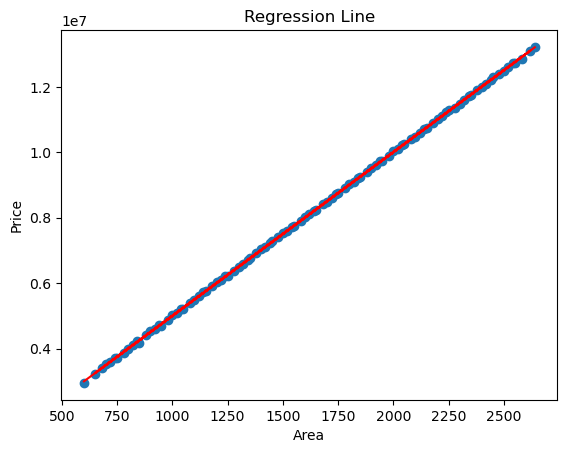

In [54]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Regression Line")
plt.show()

In [55]:
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (Coefficient): [5004.86672496]
Intercept: [-4308.37002927]


In [56]:
print("Correlation between Area and Price:", data['Area'].corr(data['Price']))

Correlation between Area and Price: 0.9999690075010933


In [57]:
print("R² Score:", r2)

R² Score: 0.9999271935802416


In [58]:
print("BUSINESS INSIGHTS")
print("----------------------------------")
print(f"For every 1 sq.ft increase, price increases by approximately ₹{float(model.coef_[0]):,.0f}.")
print(f"The model explains {r2*100:.2f}% of the price variation.")
print("There is a strong positive relationship between area and price.")
print("This model can help buyers estimate property budget and sellers set competitive pricing.")
print("However, other factors like location and amenities are not considered.")


BUSINESS INSIGHTS
----------------------------------
For every 1 sq.ft increase, price increases by approximately ₹5,005.
The model explains 99.99% of the price variation.
There is a strong positive relationship between area and price.
This model can help buyers estimate property budget and sellers set competitive pricing.
However, other factors like location and amenities are not considered.
